<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
print(data.shape)
data.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
test_data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

Нужно TotalSpent сделать числовым признаком.

Сначала проверим все ли строки можно корректно преобразовать в числа

In [ ]:
a = list(set(data['TotalSpent'])) + list(set(test_data['TotalSpent']))
a.sort()
print(a)

[' ', ' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1006.9', '1007.8', '1007.9', '1008.55', '1008.7', '1008.7', '1009.25', '101.1', '101.45', '101.65', '101.9', '1010', '1011.05', '1011.5', '1011.8', '1012.4', '1013.05', '1013.2', '1013.35', '1013.6', '1014.25', '1016.7', '1017.35', '102.45', '102.5', '102.75', '1020.2', '1020.75', '1021.55', '1021.75', '1021.8', '1022.5', '1022.6', '1022.95', '1023.75', '1023.85', '1023.9', '1023.95', '1024', '1024.65', '1024.7', '1025.05', '1025.15', '1025.15', '1025.95', '1026.35', '1027.25', '1028.75', '1028.9', '1029.35', '1029.75', '1029.8', '103.7', '1031.1', '1031.4', '1031.7', '1032', '1032.05', '1033', '1033.9', '1033.95', '1035.5', '1035.7', '1036', '1036.75', '1037.75', '1039.45', '104.2', '104.3', '1041.8', '1042.65', '1043.3', '1043.3', '1043.35', '1043.4', '1043.8', '1045.25', '1046.1', '1046.2', '1046.5', '1047.7', '1048.45', '1048.85', '1049.05', '

Все значения колонки TotalSpent отсортировали в лексикографическом порядке -> нужно удалить строчки где в этой колонке значение ' ' и потом можно преобразовать эту колонку в числа

In [ ]:
data = data[data['TotalSpent'] != ' ']
test_data = test_data[test_data['TotalSpent'] != ' ']
data['TotalSpent'] = data['TotalSpent'].astype('float')
test_data['TotalSpent'] = test_data['TotalSpent'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
print(data.isna().sum())
print(test_data.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1759 non-null   int64  
 1   MonthlySpending           1759 non-null   float64
 2   TotalSpent                1759 non-null   float64
 3   Sex                       1759 non-null   object 
 4   IsSeniorCitizen           1759 non-null   int64  
 5   HasPartner                1759 non-null   object 
 6   HasChild                  1759 non-null   object 
 7   HasPhoneService           1759 non-null   object 
 8   HasMultiplePhoneNumbers   1759 non-null   object 
 9   HasInternetService        1759 non-null   object 
 10  HasOnlineSecurityService  1759 non-null   object 
 11  HasOnlineBackup           1759 non-null   object 
 12  HasDeviceProtection       1759 non-null   object 
 13  HasTechSupportAccess      1759 non-null   object 
 14  HasOnlin

Получается что значений None нет, значит больше ничего дропать не нужно

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

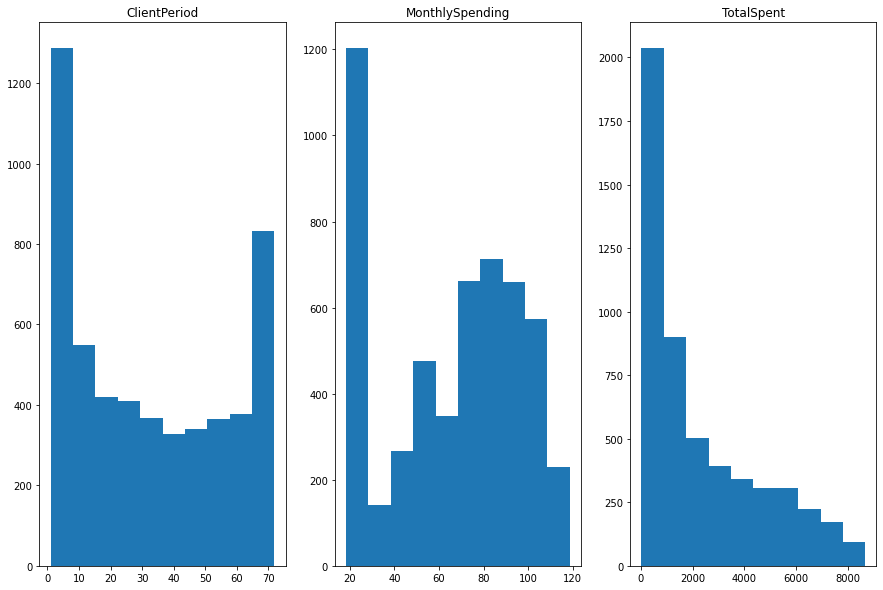

In [ ]:
figure, axis = plt.subplots(1, 3, figsize = (15, 10))
for i in range (3):
  axis[i].hist(data[num_cols[i]].values)
  axis[i].set_title(num_cols[i])
  

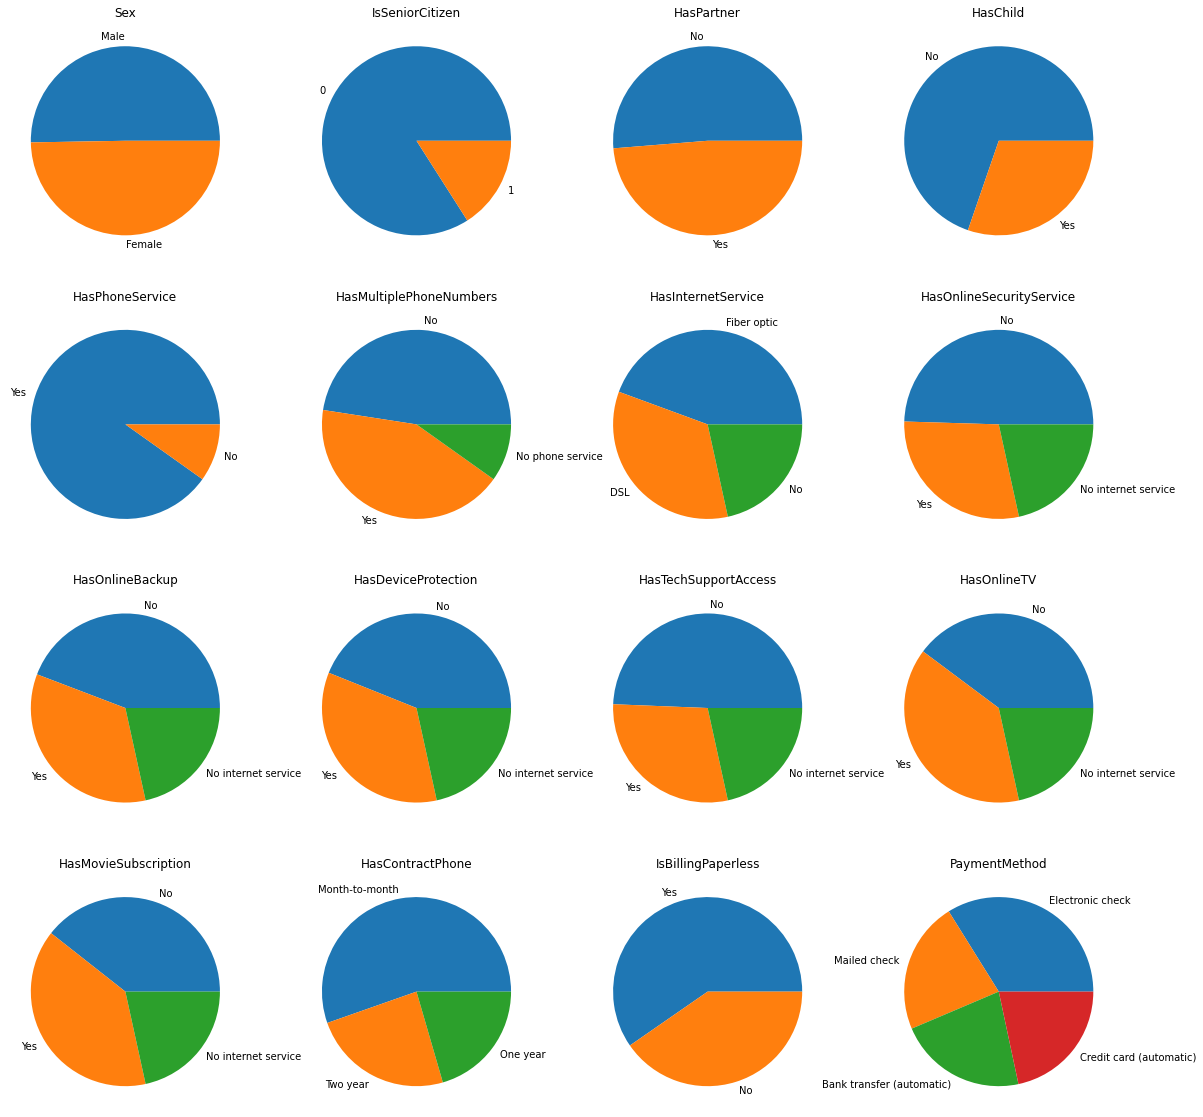

In [ ]:
figure, axis = plt.subplots(4, 4, figsize = (20, 20))
for i in range (4):
  for j in range (4):
    values = data[cat_cols[i*4+j]].value_counts().keys().tolist()
    counts = data[cat_cols[i*4+j]].value_counts().tolist()
    axis[i][j].pie(counts, labels=values)
    axis[i][j].set_title(cat_cols[i*4 + j])

Теперь посмотрим на распределение целевой переменной

In [ ]:
data_positive = data[data['Churn'] == 1]
data_negative = data[data['Churn'] == 0]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

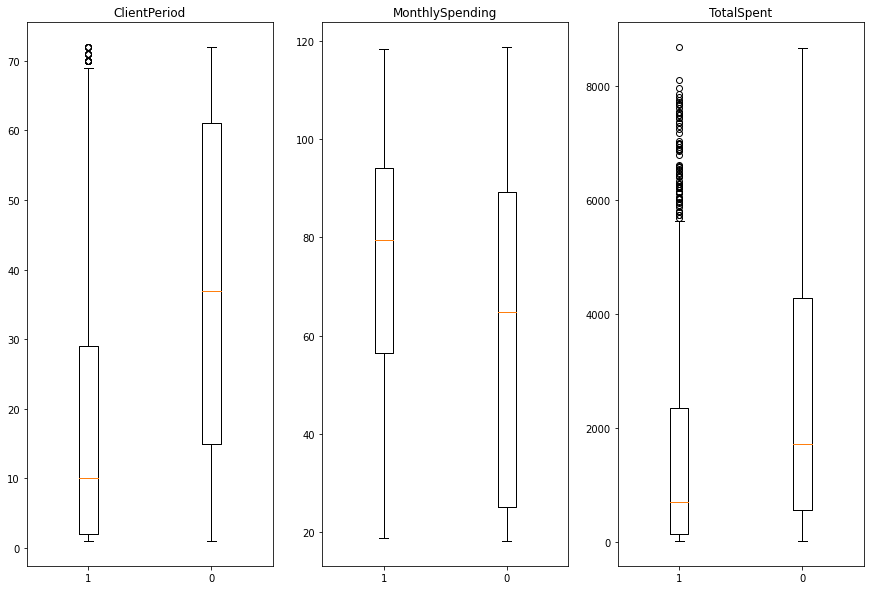

In [ ]:
figure, axis = plt.subplots(1, 3, figsize = (15, 10))
for i in range (3):
  axis[i].boxplot([data_positive[num_cols[i]], data_negative[num_cols[i]]], labels = [1, 0])
  axis[i].set_title(num_cols[i])


Значительное отличие медианн можно наблюдать для колонки ClientPeriod, в остальном различия не такие заметные.

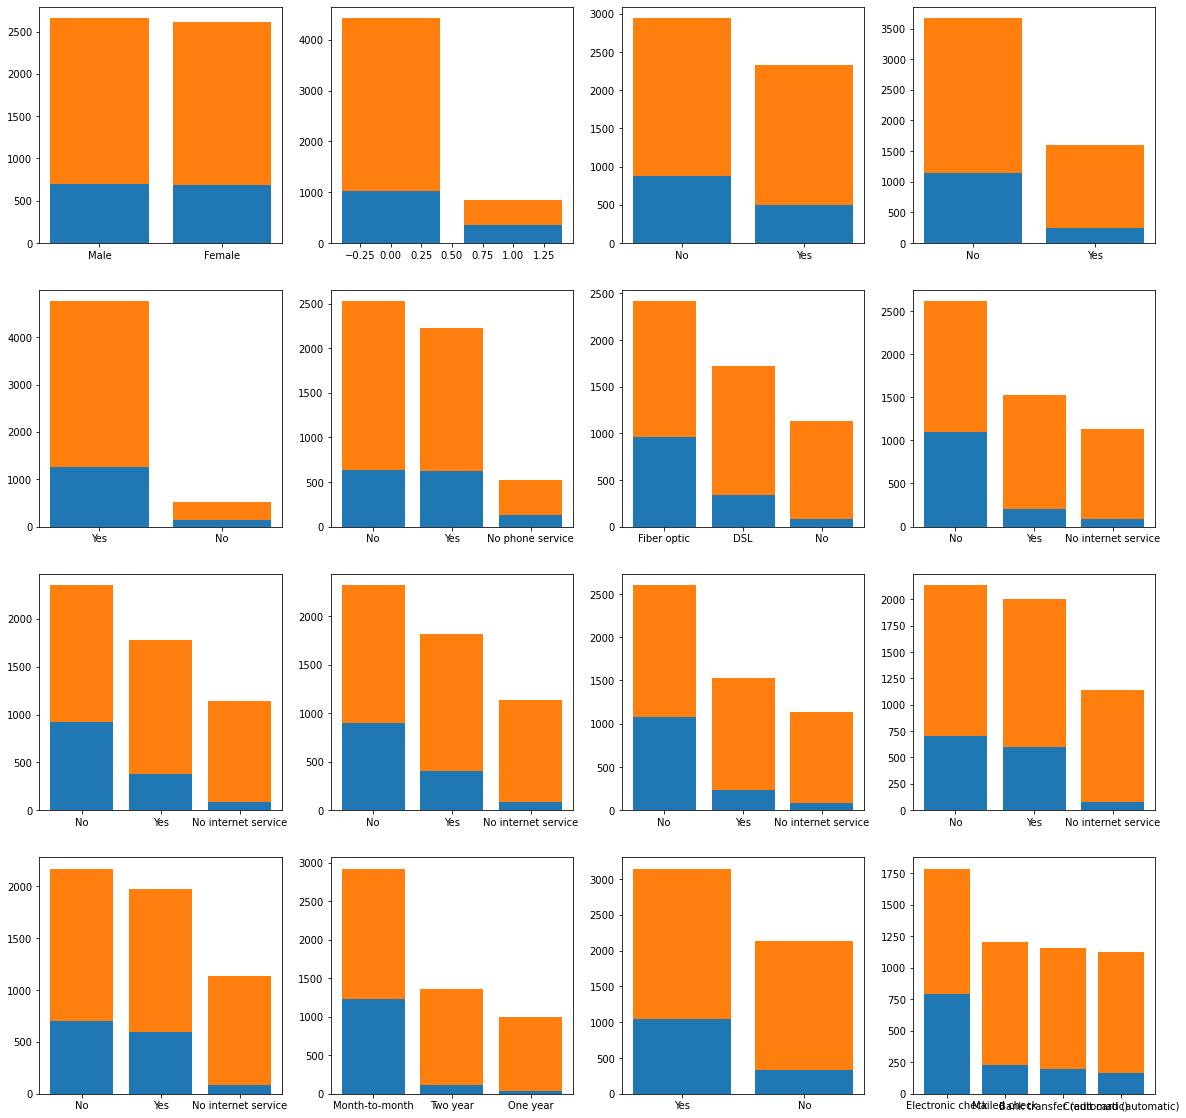

In [ ]:


figure, ax = plt.subplots(4, 4, figsize = (20, 20))
for i in range (4):
  for j in range (4):
    values = data[cat_cols[i*4+j]].value_counts().keys().tolist()
    counts_1 = data_positive[cat_cols[i*4+j]].value_counts().tolist()
    counts_2 = data_negative[cat_cols[i*4+j]].value_counts().tolist()
    ax[i][j].bar(values, counts_1)
    ax[i][j].bar(values, counts_2, bottom = counts_1)


По графикам видно что доля 1 в целевой переменной от общего числа примерно одинакова при разных значениях признака. То есть нет ярко выраженной зависимости от какого то одного признака.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

One-hot encoding можно сделать и вне pipeline

In [ ]:
initial_data = data
answers = data[data.columns[-1]]

numeric_data = data[num_cols]
categorial_data = data[cat_cols]
numeric_data_test = test_data[num_cols]
categorial_data_test = test_data[cat_cols]

dummy_features = pd.get_dummies(categorial_data)
data = pd.concat([numeric_data, dummy_features], axis=1)
dummy_features_test = pd.get_dummies(categorial_data_test)
test_data = pd.concat([numeric_data_test, dummy_features_test], axis=1)

In [ ]:
cls = make_pipeline(
  StandardScaler(),
  LogisticRegression()
)
feature_matrix = data.values

In [ ]:
params = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
cls_grid = GridSearchCV(cls, params, cv=5, scoring='roc_auc', 
                        n_jobs=-1, refit=True)
cls_grid.fit(feature_matrix, answers)
print(cls_grid.best_params_)
print(cls_grid.best_score_)


{'logisticregression__C': 100}
0.844816238854345


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший результат 0.844816 при параметре C=100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
X = initial_data
y = X[X.columns[-1]]
X = X.iloc[:, :-1]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)
cat = CatBoostClassifier()

cat.fit(X_train, y_train, cat_features=cat_cols, silent=True)

y_train_predicted = cat.predict_proba(X_train)[:, 1]
y_test_predicted = cat.predict_proba(X_valid)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)
print(train_auc)
print(test_auc)

0.8934524745969756
0.8404411417787214


С дефолтными параматрами качество на валидной выборке получилось 0.8404411

In [ ]:
cat = CatBoostClassifier(silent=True, eval_metric='AUC:hints=skip_train~false',cat_features=cat_cols)
params = {'learning_rate' : [0.1, 0.2, 0.5, 0.05, 0.01, 0.025],
          'n_estimators' : [100, 150, 200, 400, 600]}
cat.grid_search(params, X_train, y_train, cv=5, refit=True, verbose=5)


bestTest = 0.8666487755
bestIteration = 99

0:	loss: 0.8666488	best: 0.8666488 (0)	total: 687ms	remaining: 19.9s

bestTest = 0.8638377958
bestIteration = 29


bestTest = 0.8584842042
bestIteration = 12


bestTest = 0.8648493356
bestIteration = 99


bestTest = 0.8539873248
bestIteration = 99


bestTest = 0.8657645383
bestIteration = 99

5:	loss: 0.8657645	best: 0.8666488 (0)	total: 4.8s	remaining: 19.2s

bestTest = 0.8666487755
bestIteration = 99


bestTest = 0.8638377958
bestIteration = 29


bestTest = 0.8584842042
bestIteration = 12


bestTest = 0.8652278029
bestIteration = 138


bestTest = 0.8611197126
bestIteration = 149

10:	loss: 0.8611197	best: 0.8666488 (0)	total: 15.8s	remaining: 27.2s

bestTest = 0.8671683078
bestIteration = 147


bestTest = 0.8677635336
bestIteration = 36


bestTest = 0.8659434501
bestIteration = 60


bestTest = 0.8575345953
bestIteration = 13


bestTest = 0.8681007136
bestIteration = 170

15:	loss: 0.8681007	best: 0.8681007 (15)	total: 32.9s	remaining: 28.8

{'params': {'iterations': 200, 'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

In [ ]:
cat.get_params()


{'silent': True,
 'eval_metric': 'AUC:hints=skip_train~false',
 'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'],
 'iterations': 200,
 'learning_rate': 0.05}

В итоге лучшие параметры: iterations=200 и learning_rate=0.05

In [ ]:
y_train_predicted = cat.predict_proba(X_train)[:, 1]
y_test_predicted = cat.predict_proba(X_valid)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)
print(train_auc)
print(test_auc)

0.8757049165725813
0.8414390186364709


Попробуем немного поменять параметры вблизи полученных чтобы улучшить качество

In [ ]:
cat_new = CatBoostClassifier(silent=True, eval_metric='AUC:hints=skip_train~false',cat_features=cat_cols)
params = {'learning_rate' : [0.05, 0.04, 0.06, 0.08],
          'n_estimators' : [180, 200, 220, 250, 300]}
cat_new.grid_search(params, X_train, y_train, cv=5, refit=True, verbose=5)


bestTest = 0.8654617645
bestIteration = 159

0:	loss: 0.8654618	best: 0.8654618 (0)	total: 1.31s	remaining: 24.9s

bestTest = 0.8660673121
bestIteration = 179


bestTest = 0.8665214729
bestIteration = 67


bestTest = 0.8663563235
bestIteration = 38


bestTest = 0.8681007136
bestIteration = 170


bestTest = 0.8678254647
bestIteration = 108

5:	loss: 0.8678255	best: 0.8681007 (4)	total: 10.3s	remaining: 24s

bestTest = 0.8657817414
bestIteration = 50


bestTest = 0.8678323459
bestIteration = 25


bestTest = 0.8681007136
bestIteration = 170


bestTest = 0.8678254647
bestIteration = 108


bestTest = 0.8657817414
bestIteration = 50

10:	loss: 0.8657817	best: 0.8681007 (4)	total: 24.7s	remaining: 20.2s

bestTest = 0.8678323459
bestIteration = 25


bestTest = 0.8681007136
bestIteration = 170


bestTest = 0.8678254647
bestIteration = 108


bestTest = 0.8657817414
bestIteration = 50


bestTest = 0.8678323459
bestIteration = 25

15:	loss: 0.8678323	best: 0.8681007 (4)	total: 41.5s	remaining: 10

{'params': {'iterations': 200, 'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

In [ ]:
cat_new.get_params()

{'silent': True,
 'eval_metric': 'AUC:hints=skip_train~false',
 'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'],
 'iterations': 200,
 'learning_rate': 0.05}

In [ ]:
y_train_predicted = cat_new.predict_proba(X_train)[:, 1]
y_test_predicted = cat_new.predict_proba(X_valid)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)
print(train_auc)
print(test_auc)

0.8757049165725813
0.8414390186364709


В итоге получились те же параметры: 200 и 0.05

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

С новыми параметрамиiterations=200 и learning_rate=0.05 получилось качество на валидной выборке 0.841439

# Предсказания

In [ ]:
best_model = cat

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')

In [ ]:
ans = pd.read_csv('./my_submission.csv')
keep_col = ['Id','Churn']
new_ans = ans[keep_col]
new_ans.to_csv("newFile.csv", index=False)
new_ans.head()

,Id,Churn
0,0,0.032912
1,1,0.748210
2,2,0.677219
3,3,0.011794
4,4,0.004313


В итоге скор на кагле вышел больше 84 так что обучилось вполне неплохо

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.